In [56]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklift.models import TwoModels
import lightgbm as lgb
from sklift.metrics import qini_auc_score
from sklift.viz import plot_qini_curve
from imblearn.pipeline import Pipeline

%matplotlib inline

In [35]:
#Read the dataset
df = pd.read_csv("criteo-uplift-data.csv")

In [3]:
df.shape

(13979592, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


In [5]:
df.isnull().sum()

f0            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
treatment     0
conversion    0
visit         0
exposure      0
dtype: int64

In [6]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07
mean,1.962030e+01,1.006998e+01,8.446582e+00,4.178923e+00,1.033884e+01,4.028513e+00,-4.155356e+00,5.101765e+00,3.933581e+00,1.602764e+01,5.333396e+00,-1.709672e-01,8.500001e-01,2.916680e-03,4.699200e-02,3.063122e-02
std,5.377464e+00,1.047557e-01,2.993161e-01,1.336645e+00,3.433081e-01,4.310974e-01,4.577914e+00,1.205248e+00,5.665958e-02,7.018975e+00,1.682288e-01,2.283277e-02,3.570713e-01,5.392748e-02,2.116217e-01,1.723164e-01
min,1.261636e+01,1.005965e+01,8.214383e+00,-8.398387e+00,1.028053e+01,-9.011892e+00,-3.142978e+01,4.833815e+00,3.635107e+00,1.319006e+01,5.300375e+00,-1.383941e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.261636e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-6.699321e+00,4.833815e+00,3.910792e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.192341e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-2.411115e+00,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.443646e+01,1.005965e+01,8.723335e+00,4.679882e+00,1.028053e+01,4.115453e+00,2.944427e-01,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.674526e+01,1.634419e+01,9.051962e+00,4.679882e+00,2.112351e+01,4.115453e+00,2.944427e-01,1.199840e+01,3.971858e+00,7.529502e+01,6.473917e+00,-1.686792e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:>

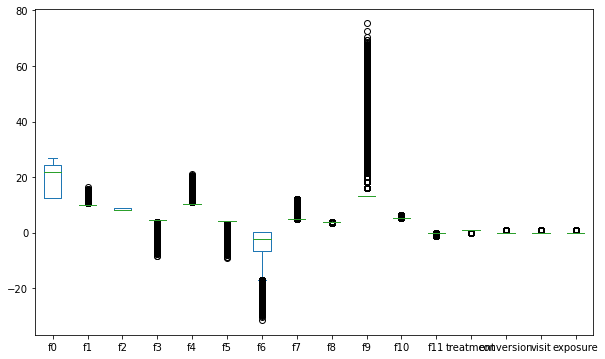

In [7]:
df.plot.box(figsize=(10,6))

In [8]:
df['treatment'].value_counts(normalize = True)

1    0.85
0    0.15
Name: treatment, dtype: float64

<AxesSubplot:xlabel='treatment', ylabel='count'>

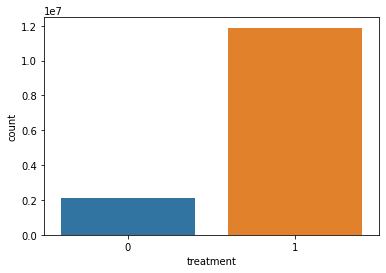

In [9]:
sns.countplot(x=df.treatment)

In [10]:
df['visit'].value_counts(normalize = True)

0    0.953008
1    0.046992
Name: visit, dtype: float64

<AxesSubplot:xlabel='visit', ylabel='count'>

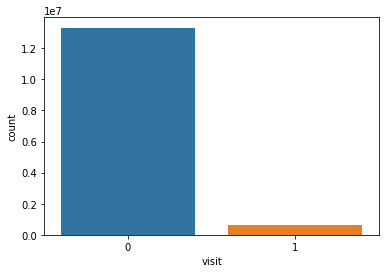

In [11]:
sns.countplot(x=df.visit)

In [12]:
df['conversion'].value_counts(normalize = True)

0    0.997083
1    0.002917
Name: conversion, dtype: float64

<AxesSubplot:xlabel='conversion', ylabel='count'>

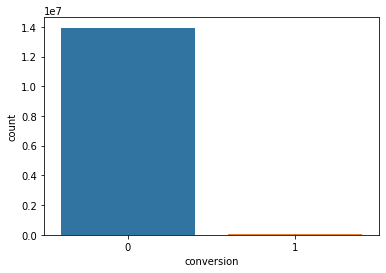

In [13]:
sns.countplot(x=df.conversion)

In [14]:
df['exposure'].value_counts(normalize = True)

0    0.969369
1    0.030631
Name: exposure, dtype: float64

<AxesSubplot:xlabel='exposure', ylabel='count'>

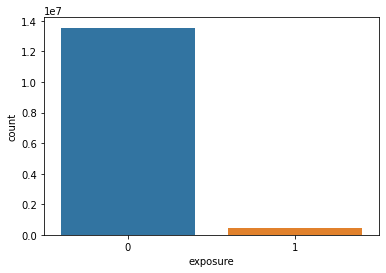

In [15]:
sns.countplot(x=df.exposure)

Text(0.5, 1.0, 'Feature Heatmap')

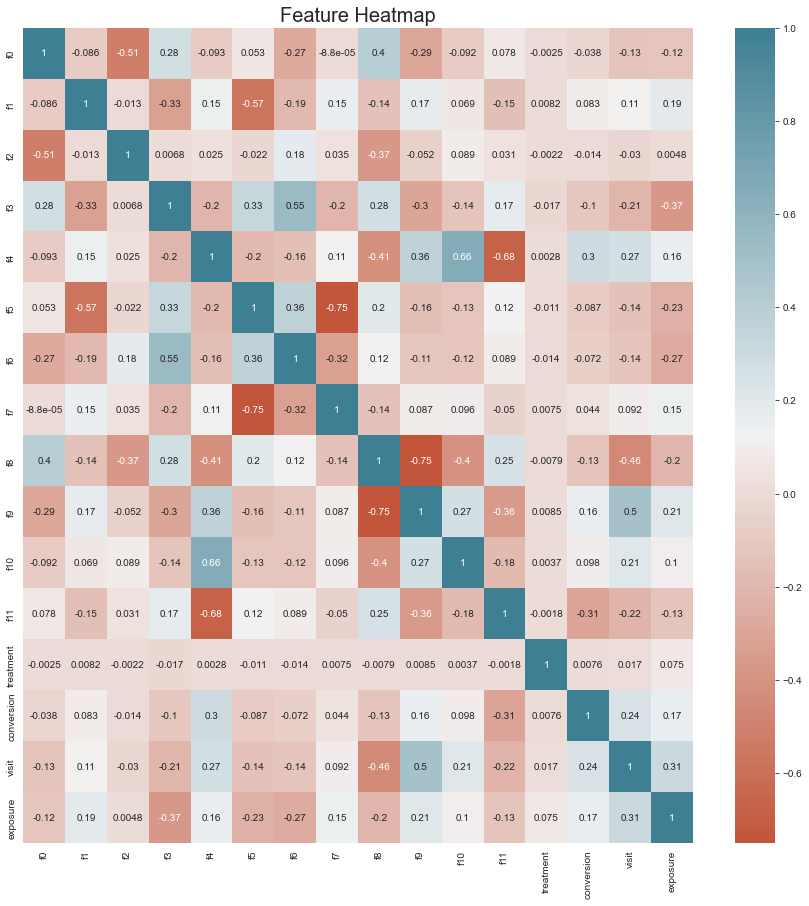

In [16]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,15))

sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True)
plt.title("Feature Heatmap", fontsize = 20)

In [17]:
pd.crosstab(df.treatment, df.visit, normalize='index')

visit,0,1
treatment,,
0,0.961799,0.038201
1,0.951457,0.048543


In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [19]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [20]:
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [61]:
X = df.drop(columns=['conversion','treatment'])

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 14 columns):
 #   Column    Dtype  
---  ------    -----  
 0   f0        float64
 1   f1        float64
 2   f2        float64
 3   f3        float64
 4   f4        float64
 5   f5        float64
 6   f6        float64
 7   f7        float64
 8   f8        float64
 9   f9        float64
 10  f10       float64
 11  f11       float64
 12  visit     int64  
 13  exposure  int64  
dtypes: float64(12), int64(2)
memory usage: 1.5 GB


In [64]:
treatment = df['treatment']

In [41]:
y = df['conversion']

In [65]:
X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(X,y, treatment, random_state=23, stratify=y, test_size=0.33)

In [66]:
print(X_train.shape, X_test.shape, treatment_train.shape, treatment_test.shape, y_train.shape, y_test.shape)

(9366326, 14) (4613266, 14) (9366326,) (4613266,) (9366326,) (4613266,)


In [67]:
treatment_model = CatBoostClassifier(random_state=23)
control_model = CatBoostClassifier(random_state=23)
tm = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='vanilla')

In [68]:
tm = tm.fit(X_train, y_train, treatment_train)

Learning rate set to 0.5
0:	learn: 0.4748046	total: 2.73s	remaining: 45m 28s
1:	learn: 0.4303415	total: 4.05s	remaining: 33m 39s
2:	learn: 0.4213898	total: 5.43s	remaining: 30m 6s
3:	learn: 0.4185711	total: 6.72s	remaining: 27m 54s
4:	learn: 0.4182554	total: 8s	remaining: 26m 31s
5:	learn: 0.4187121	total: 9.42s	remaining: 26m
6:	learn: 0.4178287	total: 10.7s	remaining: 25m 20s
7:	learn: 0.4178204	total: 11.9s	remaining: 24m 37s
8:	learn: 0.4179168	total: 13.3s	remaining: 24m 23s
9:	learn: 0.4178224	total: 14.8s	remaining: 24m 25s
10:	learn: 0.4177982	total: 16.3s	remaining: 24m 28s
11:	learn: 0.4178336	total: 17.6s	remaining: 24m 12s
12:	learn: 0.4178280	total: 19.2s	remaining: 24m 18s
13:	learn: 0.4178251	total: 21.1s	remaining: 24m 44s
14:	learn: 0.4178039	total: 22.4s	remaining: 24m 28s
15:	learn: 0.4178925	total: 23.5s	remaining: 24m 7s
16:	learn: 0.4178880	total: 24.8s	remaining: 23m 56s
17:	learn: 0.4178554	total: 26.3s	remaining: 23m 54s
18:	learn: 0.4178676	total: 27.5s	remain

153:	learn: 0.4176358	total: 3m 54s	remaining: 21m 30s
154:	learn: 0.4176285	total: 3m 56s	remaining: 21m 28s
155:	learn: 0.4176302	total: 3m 57s	remaining: 21m 25s
156:	learn: 0.4176309	total: 3m 59s	remaining: 21m 24s
157:	learn: 0.4176314	total: 4m	remaining: 21m 23s
158:	learn: 0.4176173	total: 4m 2s	remaining: 21m 21s
159:	learn: 0.4176235	total: 4m 3s	remaining: 21m 19s
160:	learn: 0.4176148	total: 4m 5s	remaining: 21m 17s
161:	learn: 0.4176160	total: 4m 6s	remaining: 21m 16s
162:	learn: 0.4176112	total: 4m 8s	remaining: 21m 15s
163:	learn: 0.4176072	total: 4m 9s	remaining: 21m 13s
164:	learn: 0.4176017	total: 4m 11s	remaining: 21m 11s
165:	learn: 0.4176008	total: 4m 12s	remaining: 21m 10s
166:	learn: 0.4175993	total: 4m 14s	remaining: 21m 8s
167:	learn: 0.4176127	total: 4m 15s	remaining: 21m 6s
168:	learn: 0.4176030	total: 4m 16s	remaining: 21m 3s
169:	learn: 0.4176082	total: 4m 18s	remaining: 21m 2s
170:	learn: 0.4176018	total: 4m 20s	remaining: 21m 1s
171:	learn: 0.4176058	tot

304:	learn: 0.4173835	total: 7m 45s	remaining: 17m 39s
305:	learn: 0.4173782	total: 7m 47s	remaining: 17m 41s
306:	learn: 0.4173759	total: 7m 50s	remaining: 17m 41s
307:	learn: 0.4173771	total: 7m 52s	remaining: 17m 40s
308:	learn: 0.4173719	total: 7m 53s	remaining: 17m 39s
309:	learn: 0.4173992	total: 7m 55s	remaining: 17m 38s
310:	learn: 0.4173937	total: 7m 57s	remaining: 17m 36s
311:	learn: 0.4173937	total: 7m 58s	remaining: 17m 36s
312:	learn: 0.4173892	total: 8m	remaining: 17m 34s
313:	learn: 0.4173888	total: 8m 1s	remaining: 17m 32s
314:	learn: 0.4173870	total: 8m 3s	remaining: 17m 30s
315:	learn: 0.4173881	total: 8m 4s	remaining: 17m 29s
316:	learn: 0.4173884	total: 8m 6s	remaining: 17m 28s
317:	learn: 0.4173861	total: 8m 8s	remaining: 17m 27s
318:	learn: 0.4173848	total: 8m 10s	remaining: 17m 26s
319:	learn: 0.4173850	total: 8m 11s	remaining: 17m 24s
320:	learn: 0.4173808	total: 8m 13s	remaining: 17m 23s
321:	learn: 0.4173777	total: 8m 14s	remaining: 17m 21s
322:	learn: 0.41737

453:	learn: 0.4171399	total: 11m 35s	remaining: 13m 56s
454:	learn: 0.4171397	total: 11m 36s	remaining: 13m 54s
455:	learn: 0.4171358	total: 11m 38s	remaining: 13m 53s
456:	learn: 0.4171324	total: 11m 39s	remaining: 13m 51s
457:	learn: 0.4171325	total: 11m 41s	remaining: 13m 49s
458:	learn: 0.4171294	total: 11m 42s	remaining: 13m 48s
459:	learn: 0.4171283	total: 11m 44s	remaining: 13m 46s
460:	learn: 0.4171267	total: 11m 46s	remaining: 13m 46s
461:	learn: 0.4171253	total: 11m 49s	remaining: 13m 45s
462:	learn: 0.4171226	total: 11m 51s	remaining: 13m 44s
463:	learn: 0.4171153	total: 11m 52s	remaining: 13m 43s
464:	learn: 0.4171124	total: 11m 54s	remaining: 13m 41s
465:	learn: 0.4171108	total: 11m 55s	remaining: 13m 40s
466:	learn: 0.4171103	total: 11m 57s	remaining: 13m 38s
467:	learn: 0.4171172	total: 11m 58s	remaining: 13m 37s
468:	learn: 0.4171084	total: 12m	remaining: 13m 35s
469:	learn: 0.4171125	total: 12m 1s	remaining: 13m 33s
470:	learn: 0.4171074	total: 12m 2s	remaining: 13m 31

601:	learn: 0.4168849	total: 15m 33s	remaining: 10m 17s
602:	learn: 0.4168834	total: 15m 34s	remaining: 10m 15s
603:	learn: 0.4168801	total: 15m 36s	remaining: 10m 13s
604:	learn: 0.4168784	total: 15m 37s	remaining: 10m 12s
605:	learn: 0.4168839	total: 15m 39s	remaining: 10m 10s
606:	learn: 0.4168833	total: 15m 41s	remaining: 10m 9s
607:	learn: 0.4168826	total: 15m 42s	remaining: 10m 7s
608:	learn: 0.4168824	total: 15m 44s	remaining: 10m 6s
609:	learn: 0.4168826	total: 15m 45s	remaining: 10m 4s
610:	learn: 0.4168784	total: 15m 47s	remaining: 10m 3s
611:	learn: 0.4168736	total: 15m 48s	remaining: 10m 1s
612:	learn: 0.4168729	total: 15m 50s	remaining: 9m 59s
613:	learn: 0.4168719	total: 15m 51s	remaining: 9m 58s
614:	learn: 0.4168706	total: 15m 52s	remaining: 9m 56s
615:	learn: 0.4168686	total: 15m 54s	remaining: 9m 55s
616:	learn: 0.4168699	total: 15m 55s	remaining: 9m 53s
617:	learn: 0.4168669	total: 15m 57s	remaining: 9m 51s
618:	learn: 0.4168654	total: 15m 58s	remaining: 9m 50s
619:	

751:	learn: 0.4166682	total: 19m 4s	remaining: 6m 17s
752:	learn: 0.4166666	total: 19m 6s	remaining: 6m 16s
753:	learn: 0.4166635	total: 19m 8s	remaining: 6m 14s
754:	learn: 0.4166615	total: 19m 9s	remaining: 6m 13s
755:	learn: 0.4166564	total: 19m 11s	remaining: 6m 11s
756:	learn: 0.4166568	total: 19m 12s	remaining: 6m 10s
757:	learn: 0.4166549	total: 19m 14s	remaining: 6m 8s
758:	learn: 0.4166549	total: 19m 15s	remaining: 6m 6s
759:	learn: 0.4166528	total: 19m 16s	remaining: 6m 5s
760:	learn: 0.4166515	total: 19m 17s	remaining: 6m 3s
761:	learn: 0.4166484	total: 19m 18s	remaining: 6m 1s
762:	learn: 0.4166428	total: 19m 20s	remaining: 6m
763:	learn: 0.4166412	total: 19m 21s	remaining: 5m 58s
764:	learn: 0.4166448	total: 19m 22s	remaining: 5m 57s
765:	learn: 0.4166426	total: 19m 24s	remaining: 5m 55s
766:	learn: 0.4166408	total: 19m 25s	remaining: 5m 53s
767:	learn: 0.4166339	total: 19m 26s	remaining: 5m 52s
768:	learn: 0.4166317	total: 19m 28s	remaining: 5m 50s
769:	learn: 0.4166293	t

902:	learn: 0.4164235	total: 22m 36s	remaining: 2m 25s
903:	learn: 0.4164209	total: 22m 37s	remaining: 2m 24s
904:	learn: 0.4164213	total: 22m 38s	remaining: 2m 22s
905:	learn: 0.4164201	total: 22m 39s	remaining: 2m 21s
906:	learn: 0.4164197	total: 22m 40s	remaining: 2m 19s
907:	learn: 0.4164203	total: 22m 42s	remaining: 2m 18s
908:	learn: 0.4164177	total: 22m 43s	remaining: 2m 16s
909:	learn: 0.4164164	total: 22m 44s	remaining: 2m 14s
910:	learn: 0.4164158	total: 22m 45s	remaining: 2m 13s
911:	learn: 0.4164156	total: 22m 46s	remaining: 2m 11s
912:	learn: 0.4164139	total: 22m 47s	remaining: 2m 10s
913:	learn: 0.4164125	total: 22m 49s	remaining: 2m 8s
914:	learn: 0.4164123	total: 22m 50s	remaining: 2m 7s
915:	learn: 0.4164107	total: 22m 52s	remaining: 2m 5s
916:	learn: 0.4164072	total: 22m 53s	remaining: 2m 4s
917:	learn: 0.4164075	total: 22m 54s	remaining: 2m 2s
918:	learn: 0.4164101	total: 22m 56s	remaining: 2m 1s
919:	learn: 0.4164068	total: 22m 57s	remaining: 1m 59s
920:	learn: 0.41

65:	learn: 0.2135040	total: 908ms	remaining: 12.9s
66:	learn: 0.2134163	total: 924ms	remaining: 12.9s
67:	learn: 0.2133250	total: 940ms	remaining: 12.9s
68:	learn: 0.2132062	total: 959ms	remaining: 12.9s
69:	learn: 0.2131098	total: 977ms	remaining: 13s
70:	learn: 0.2130241	total: 992ms	remaining: 13s
71:	learn: 0.2129550	total: 1s	remaining: 12.9s
72:	learn: 0.2128949	total: 1.02s	remaining: 13s
73:	learn: 0.2127830	total: 1.04s	remaining: 13s
74:	learn: 0.2126774	total: 1.05s	remaining: 13s
75:	learn: 0.2125770	total: 1.07s	remaining: 13s
76:	learn: 0.2125064	total: 1.08s	remaining: 13s
77:	learn: 0.2124228	total: 1.1s	remaining: 13s
78:	learn: 0.2123068	total: 1.12s	remaining: 13.1s
79:	learn: 0.2121807	total: 1.14s	remaining: 13.1s
80:	learn: 0.2120967	total: 1.16s	remaining: 13.1s
81:	learn: 0.2120239	total: 1.18s	remaining: 13.2s
82:	learn: 0.2119475	total: 1.2s	remaining: 13.2s
83:	learn: 0.2118549	total: 1.23s	remaining: 13.4s
84:	learn: 0.2118000	total: 1.24s	remaining: 13.4s
8

233:	learn: 0.2037796	total: 3.15s	remaining: 10.3s
234:	learn: 0.2037175	total: 3.17s	remaining: 10.3s
235:	learn: 0.2036740	total: 3.18s	remaining: 10.3s
236:	learn: 0.2036418	total: 3.19s	remaining: 10.3s
237:	learn: 0.2035986	total: 3.21s	remaining: 10.3s
238:	learn: 0.2035167	total: 3.22s	remaining: 10.3s
239:	learn: 0.2034669	total: 3.23s	remaining: 10.2s
240:	learn: 0.2033976	total: 3.25s	remaining: 10.2s
241:	learn: 0.2033722	total: 3.26s	remaining: 10.2s
242:	learn: 0.2033316	total: 3.27s	remaining: 10.2s
243:	learn: 0.2032645	total: 3.28s	remaining: 10.2s
244:	learn: 0.2032242	total: 3.29s	remaining: 10.2s
245:	learn: 0.2031650	total: 3.31s	remaining: 10.1s
246:	learn: 0.2031328	total: 3.32s	remaining: 10.1s
247:	learn: 0.2031020	total: 3.33s	remaining: 10.1s
248:	learn: 0.2030488	total: 3.34s	remaining: 10.1s
249:	learn: 0.2030114	total: 3.35s	remaining: 10.1s
250:	learn: 0.2029589	total: 3.37s	remaining: 10.1s
251:	learn: 0.2028750	total: 3.38s	remaining: 10s
252:	learn: 0.

400:	learn: 0.1948610	total: 5.26s	remaining: 7.86s
401:	learn: 0.1948003	total: 5.28s	remaining: 7.85s
402:	learn: 0.1947407	total: 5.3s	remaining: 7.84s
403:	learn: 0.1946894	total: 5.31s	remaining: 7.83s
404:	learn: 0.1946226	total: 5.33s	remaining: 7.83s
405:	learn: 0.1945407	total: 5.34s	remaining: 7.81s
406:	learn: 0.1945272	total: 5.35s	remaining: 7.8s
407:	learn: 0.1944557	total: 5.37s	remaining: 7.79s
408:	learn: 0.1943901	total: 5.38s	remaining: 7.77s
409:	learn: 0.1943409	total: 5.39s	remaining: 7.76s
410:	learn: 0.1942979	total: 5.41s	remaining: 7.75s
411:	learn: 0.1942450	total: 5.42s	remaining: 7.74s
412:	learn: 0.1941578	total: 5.43s	remaining: 7.72s
413:	learn: 0.1941085	total: 5.45s	remaining: 7.71s
414:	learn: 0.1940342	total: 5.46s	remaining: 7.7s
415:	learn: 0.1939930	total: 5.48s	remaining: 7.69s
416:	learn: 0.1939555	total: 5.49s	remaining: 7.68s
417:	learn: 0.1939307	total: 5.51s	remaining: 7.67s
418:	learn: 0.1938608	total: 5.52s	remaining: 7.66s
419:	learn: 0.1

571:	learn: 0.1868016	total: 7.5s	remaining: 5.61s
572:	learn: 0.1867316	total: 7.51s	remaining: 5.6s
573:	learn: 0.1866982	total: 7.53s	remaining: 5.59s
574:	learn: 0.1866530	total: 7.54s	remaining: 5.57s
575:	learn: 0.1865900	total: 7.55s	remaining: 5.56s
576:	learn: 0.1865383	total: 7.57s	remaining: 5.55s
577:	learn: 0.1864707	total: 7.58s	remaining: 5.54s
578:	learn: 0.1864286	total: 7.6s	remaining: 5.52s
579:	learn: 0.1863869	total: 7.61s	remaining: 5.51s
580:	learn: 0.1863319	total: 7.62s	remaining: 5.5s
581:	learn: 0.1863014	total: 7.64s	remaining: 5.48s
582:	learn: 0.1862239	total: 7.65s	remaining: 5.47s
583:	learn: 0.1861788	total: 7.67s	remaining: 5.46s
584:	learn: 0.1861365	total: 7.69s	remaining: 5.45s
585:	learn: 0.1860976	total: 7.7s	remaining: 5.44s
586:	learn: 0.1860375	total: 7.72s	remaining: 5.43s
587:	learn: 0.1859985	total: 7.73s	remaining: 5.42s
588:	learn: 0.1859526	total: 7.75s	remaining: 5.4s
589:	learn: 0.1859188	total: 7.76s	remaining: 5.39s
590:	learn: 0.1858

734:	learn: 0.1799142	total: 9.75s	remaining: 3.52s
735:	learn: 0.1798635	total: 9.77s	remaining: 3.5s
736:	learn: 0.1798188	total: 9.79s	remaining: 3.49s
737:	learn: 0.1797738	total: 9.8s	remaining: 3.48s
738:	learn: 0.1797258	total: 9.82s	remaining: 3.47s
739:	learn: 0.1796755	total: 9.83s	remaining: 3.46s
740:	learn: 0.1796347	total: 9.85s	remaining: 3.44s
741:	learn: 0.1795957	total: 9.86s	remaining: 3.43s
742:	learn: 0.1795602	total: 9.88s	remaining: 3.42s
743:	learn: 0.1795358	total: 9.89s	remaining: 3.4s
744:	learn: 0.1794990	total: 9.9s	remaining: 3.39s
745:	learn: 0.1794701	total: 9.92s	remaining: 3.38s
746:	learn: 0.1794327	total: 9.94s	remaining: 3.37s
747:	learn: 0.1793908	total: 9.95s	remaining: 3.35s
748:	learn: 0.1793172	total: 9.96s	remaining: 3.34s
749:	learn: 0.1792459	total: 9.98s	remaining: 3.33s
750:	learn: 0.1792101	total: 10s	remaining: 3.31s
751:	learn: 0.1791513	total: 10s	remaining: 3.3s
752:	learn: 0.1791280	total: 10s	remaining: 3.29s
753:	learn: 0.1790808	t

902:	learn: 0.1731027	total: 12.2s	remaining: 1.31s
903:	learn: 0.1730759	total: 12.2s	remaining: 1.29s
904:	learn: 0.1730312	total: 12.2s	remaining: 1.28s
905:	learn: 0.1729953	total: 12.2s	remaining: 1.27s
906:	learn: 0.1729417	total: 12.2s	remaining: 1.25s
907:	learn: 0.1728780	total: 12.3s	remaining: 1.24s
908:	learn: 0.1728497	total: 12.3s	remaining: 1.23s
909:	learn: 0.1727914	total: 12.3s	remaining: 1.21s
910:	learn: 0.1727549	total: 12.3s	remaining: 1.2s
911:	learn: 0.1727303	total: 12.3s	remaining: 1.19s
912:	learn: 0.1726775	total: 12.3s	remaining: 1.17s
913:	learn: 0.1726333	total: 12.3s	remaining: 1.16s
914:	learn: 0.1725987	total: 12.3s	remaining: 1.15s
915:	learn: 0.1725722	total: 12.4s	remaining: 1.13s
916:	learn: 0.1725439	total: 12.4s	remaining: 1.12s
917:	learn: 0.1725165	total: 12.4s	remaining: 1.11s
918:	learn: 0.1724717	total: 12.4s	remaining: 1.09s
919:	learn: 0.1724177	total: 12.4s	remaining: 1.08s
920:	learn: 0.1723745	total: 12.4s	remaining: 1.07s
921:	learn: 0

In [69]:
uplift_tm = tm.predict(X_test)

In [72]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_tm, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.0493


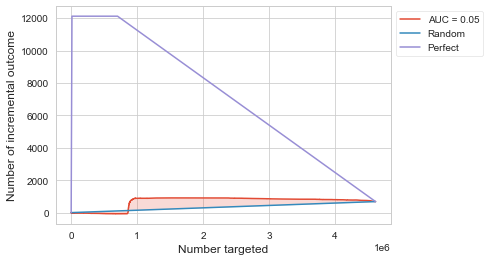

In [73]:
# with ideal Qini curve (red line)
# perfect=True

plot_qini_curve(y_test, uplift_tm, treatment_test, perfect=True);

In [23]:
X.info()

AttributeError: 'Series' object has no attribute 'info'